# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [1]:
import pandas as pd
import numpy as np
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature

E:\download\anconda\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

In [2]:
df=pd.read_excel("candyhierarchy2017.xlsx")
df.head(4)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"


In [3]:
df.shape

(2460, 120)

In [4]:
pd.set_option("display.max_columns",120)

In [5]:
df.head(1)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.iloc[:,0:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 60 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Internal ID                                                                            2460 non-null   int64 
 1   Q1: GOING OUT?                                                                         2350 non-null   object
 2   Q2: GENDER                                                                             2419 non-null   object
 3   Q3: AGE                                                                                2376 non-null   object
 4   Q4: COUNTRY                                                                            2396 non-null   object
 5   Q5: STATE, PROVINCE, COUNTY, ETC                                                   

In [7]:
df.iloc[:,60:120].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 60 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Q6 | Milk Duds                                                               1767 non-null   object 
 1   Q6 | Milky Way                                                               1772 non-null   object 
 2   Q6 | Regular M&Ms                                                            1785 non-null   object 
 3   Q6 | Peanut M&M’s                                                            1789 non-null   object 
 4   Q6 | Blue M&M's                                                              1733 non-null   object 
 5   Q6 | Red M&M's                                                               1731 non-null   object 
 6   Q6 | Green Party M&M's                  

### delet columns has more non values and delet id columns it's not important for me

In [8]:
df.drop(["Internal ID","Unnamed: 113","Q9: OTHER COMMENTS","Q8: DESPAIR OTHER","Q7: JOY OTHER","Click Coordinates (x, y)",],axis=1,inplace=True)

In [9]:
df.shape

(2460, 114)

### rename columns to make it easy

In [10]:
df.columns=df.columns.str.replace('|','')
df.columns=df.columns.str.replace('\d+', '')
df.columns=df.columns.str.split('Q').str[1]


In [11]:
df.head(1)

,: GOING OUT?,: GENDER,: AGE,: COUNTRY,": STATE, PROVINCE, COUNTY, ETC",Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,: DRESS,: DAY,: MEDIA [Daily Dish],: MEDIA [Science],: MEDIA [ESPN],: MEDIA [Yahoo]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.rename(columns = {': GOING OUT?' : 'Going Out?',
                          ': GENDER' : 'Gender',
                          ': AGE': 'Age',
                          ': COUNTRY' : 'Country',
                          ': STATE, PROVINCE, COUNTY, ETC' : 'Area',
                          ': DRESS' : 'Dress',
                          ': DAY': 'Day',
                          ': MEDIA [Daily Dish]' : 'DailyDish',
                          ': MEDIA [Science]': 'Science',
                          ': MEDIA [ESPN]' : 'ESPN',
                          ': MEDIA [Yahoo]': 'Yahoo'}, inplace=True)

In [13]:
df.head(1)

,Going Out?,Gender,Age,Country,Area,Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,DailyDish,Science,ESPN,Yahoo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.columns=df.columns.str.lower()

In [15]:
df.columns.to_list()

['going out?',
 'gender',
 'age',
 'country',
 'area',
 '   grand bar',
 '  anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes)',
 '  any full-sized candy bar',
 '  black jacks',
 '  bonkers (the candy)',
 '  bonkers (the board game)',
 '  bottle caps',
 "  box'o'raisins",
 '  broken glow stick',
 '  butterfinger',
 '  cadbury creme eggs',
 '  candy corn',
 '  candy that is clearly just the stuff given out for free at restaurants',
 '  caramellos',
 '  cash, or other forms of legal tender',
 '  chardonnay',
 '  chick-o-sticks (we don’t know what that is)',
 '  chiclets',
 '  coffee crisp',
 '  creepy religious comics/chick tracts',
 '  dental paraphenalia',
 '  dots',
 '  dove bars',
 '  fuzzy peaches',
 '  generic brand acetaminophen',
 '  glow sticks',
 '  goo goo clusters',
 "  good n' plenty",
 '  gum from baseball cards',
 '  gummy bears straight up',
 '  hard candy',
 '  healthy fruit',
 '  heath bar',
 "  hershey's dark chocolate",
 '  hershey’s mil

### check and delet duplicated rows

In [16]:
df.duplicated().sum()

35

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
# function for help me
def unique_valuecounts(x):
        print(df[x].unique())
        print('\n--------------------------\n')
        print(df[x].value_counts().head(10))
        print('\n_________________________________\n')
        print("NaN=",df[x].isnull().sum())
        print('\n////////////////////////////////\n')


### clean going out? column

In [20]:
unique_valuecounts("going out?")

[nan 'No' 'Yes']

--------------------------

No     2023
Yes     312
Name: going out?, dtype: int64

_________________________________

NaN= 90

////////////////////////////////



In [21]:
df["going out?"].fillna("No",inplace=True)

In [22]:
df["going out?"].isnull().sum()

0

### clean gender column


In [23]:
 unique_valuecounts("gender")

[nan 'Male' 'Female' "I'd rather not say" 'Other']

--------------------------

Male                  1458
Female                 838
I'd rather not say      81
Other                   30
Name: gender, dtype: int64

_________________________________

NaN= 18

////////////////////////////////



In [24]:
df["gender"].replace("Other","I'd rather not say",inplace=True)

In [25]:
df["gender"].fillna("Male",inplace=True)

In [26]:
 unique_valuecounts("gender")

['Male' 'Female' "I'd rather not say"]

--------------------------

Male                  1476
Female                 838
I'd rather not say     111
Name: gender, dtype: int64

_________________________________

NaN= 0

////////////////////////////////



### clean age column


In [27]:
 unique_valuecounts("age")

[nan 44 49 40 23 53 33 43 56 64 37 59 48 54 36 45 25 34 35 38 58 50 47 16
 52 63 65 41 27 31 61 46 42 62 29 39 32 28 69 67 30 22 26 51 70 24 18 19
 'Old enough' 57 60 66 12 'Many' 55 72 '?' 21 11 'no' 9 68 20 6 10 71 90
 13 '45-55' 312 99 7 'hahahahaha' 88 39.4 74 102 'older than dirt' 17 15 8
 75 '5u' 'Enough' 'See question 2' '24-50' 14 'Over 50' 100 76 1000
 'sixty-nine' '46 Halloweens.' 'ancient' 77 'OLD' 'old' 73 70.5 1
 'MY NAME JEFF' 4 '59 on the day after Halloween' 'old enough' 'your mom'
 'I can remember when Java was a cool new language' '60+']

--------------------------

40    92
34    90
37    89
43    86
42    79
36    79
38    76
35    76
44    76
45    75
Name: age, dtype: int64

_________________________________

NaN= 55

////////////////////////////////



In [28]:
df["age"]=pd.to_numeric(df['age'],errors='coerce')

In [29]:
df["age"].describe()


count    2346.000000
mean       42.620588
std        23.873418
min         1.000000
25%        34.000000
50%        41.000000
75%        50.000000
max      1000.000000
Name: age, dtype: float64

In [30]:
df.loc[df['age']>80,"age"]=np.nan

In [31]:
df["age"].fillna(41,inplace=True)

In [32]:
df["age"].replace("unavailable",'41',inplace=True)

In [33]:
 unique_valuecounts("age")

[41.  44.  49.  40.  23.  53.  33.  43.  56.  64.  37.  59.  48.  54.
 36.  45.  25.  34.  35.  38.  58.  50.  47.  16.  52.  63.  65.  27.
 31.  61.  46.  42.  62.  29.  39.  32.  28.  69.  67.  30.  22.  26.
 51.  70.  24.  18.  19.  57.  60.  66.  12.  55.  72.  21.  11.   9.
 68.  20.   6.  10.  71.  13.   7.  39.4 74.  17.  15.   8.  75.  14.
 76.  77.  73.  70.5  1.   4. ]

--------------------------

41.0    162
40.0     92
34.0     90
37.0     89
43.0     86
36.0     79
42.0     79
44.0     76
38.0     76
35.0     76
Name: age, dtype: int64

_________________________________

NaN= 0

////////////////////////////////



### clean country column


In [34]:
 unique_valuecounts("country")

[nan 'USA ' 'USA' 'us' 'usa' 'canada' 'Canada' 'Us' 'US' 'Murica'
 'United States' 'uk' 'United Kingdom' 'united states' 'Usa'
 'United States ' 'United staes' 'United States of America' 'UAE'
 'England' 'UK' 'canada ' 'Mexico' 'United states' 'u.s.a.' 'USAUSAUSA'
 'america' 35 'france' 'United States of America ' 'U.S.A.' 'finland'
 'unhinged states' 'Canada ' 'united states of america' 'US of A'
 'Unites States' 'The United States' 'North Carolina ' 'Unied States'
 'Netherlands' 'germany' 'Europe' 'Earth' 'U S' 'u.s.' 'U.K. '
 'Costa Rica' 'The United States of America' 'unite states' 'U.S.' 46
 'cascadia' 'Australia' 'insanity lately' 'Greece'
 'USA? Hard to tell anymore..' "'merica" 'usas' 'Pittsburgh' 45
 'United State' 32 'France' 'australia' 'A' 'Can' 'Canae' 'New York'
 'Trumpistan' 'Ireland' 'United Sates' 'Korea' 'California' 'Japan' 'USa'
 'South africa'
 'I pretend to be from Canada, but I am really from the United States.'
 'Usa ' 'Uk' 'Iceland' 'Germany' 'Canada`' 'Scotla

In [35]:
df['country'] = df['country'].str.strip().str.lower()

In [36]:
countries = pd.Series(['usa', 'united states of america','america','united kingdom england', 'hong kong', 'china', 'sweden', 'spain',
                       'ireland', 'taiwan', 'singapore', 'netherlands', 
                       'indonesia', 'south korea', 'switzerland', 'denmark', 'scotland', 'canada', 'iceland', 'south africa', 
                       'japan', 'greece', 'costa rica', 'germany', 'finland', 'france', 'mexico'])

for country in countries:
    matches = process.extract(country, df['country'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 70:
            df.loc[df['country'] == potential_match[0], 'country'] = country
            
df['country'].unique()

array([nan, 'usa', 'canada', 'america', 'uk', 'uae',
       'united kingdom england', 'mexico', 'france', 'finland',
       'north carolina', 'netherlands', 'germany', 'europe', 'earth',
       'u.k.', 'costa rica', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', 'pittsburgh', 'new york',
       'trumpistan', 'south korea', 'california', 'japan', 'scotland',
       'denmark', 'switzerland', 'ud', 'new jersey', 'indonesia',
       'atlantis', 'murrika', 'alaska', 'soviet canuckistan', 'singapore',
       'china', 'taiwan', 'hong kong', 'spain', 'sweden', 'narnia',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [37]:
df['country'] = df['country'].replace({'murica':'usa', 'united states of america':'usa','america':'usa', 'u.s.a.':'usa',
'north carolina':'usa', 'usa? hard to tell anymore..':'usa', 'pittsburgh':'usa', 'new york':'usa', 'trumpistan':'usa',
          'california':'usa', 'ud':'usa', 'new jersey':'usa', 'endland':'uk', 'soviet canuckistan':'canada',
           'u s a':'usa', 'united kingdom england':'uk', 'u.k.':'uk', 'cascadia':'usa'})

In [38]:
unknown = [x for x in df['country'].unique()]
unknown.remove('usa')
unknown.remove('canada')
unknown.remove('uk')

In [39]:
df["country"]= df["country"].replace(to_replace = unknown, value = 'unknown')
df['country'].value_counts()

usa        2058
canada      228
unknown     118
uk           21
Name: country, dtype: int64

### clean area columns


In [40]:
   unique_valuecounts("area")

[nan 'NM' 'Virginia' 'or' 'exton pa' 'Colorado ' 'ontario' 'Ontario' 'Wa'
 'Quebec' 'NY' 'California' 'Texas' 'NEW YORK' 'CO' 'IN' 'MN'
 'aberdeenshire' 'Alberta' 'Wisconsin, 53705' 'RI' 'NC' 'Scotland'
 'minnesota' 'Michigan' 'Florida' 'New Jersey' 'VA' 'Colorado'
 'Los Angeles, California' 'CA' 'New York ' 'Chicago, Illinois' 'Nj'
 'Wisconsin' 'Minnesota ' 'London' 'mn' 'TEXAS' 'Illinois'
 'District of Columbia' 'Washington' 'Massachusetts ' 'OR' 'Montana'
 'New York' 'massachusetts' 'Abu Dhabi' 'TX' 'Arizona' 'Dc' 'yukon'
 'Pennsylvania ' 'MD' 'Ohio' 'Alberta ' 'OXFORDSHIRE' 'DC' 'Iowa' 'Mn'
 'TN' 'BC' 'Maryland' 'MI' 'Wisconsin ' 'alaska' 'Ny'
 'Colorado, Jefferson county ' 'Louisiana' 'pa' 'CO, Larimer County'
 'Nebraska ' 'Oregon' 'UT' 'ny' 'Pennsylvania' 'CDMX' 'north carolina'
 'Tennessee ' 'Texas ' 'Knox county, Tennessee' 'New Mexico' 'Maine'
 'maine' 'Virginia, Arlington' 'WA' 'MO' 'Illinois ' 'Mi' 'MA' 'Alaska'
 'New York, NY' 'Il' 'PA' 'New Hampshire ' 'Washington ' 'Massa

In [41]:
df["area"].nunique()

511

### 453 uniques number very big so  i delet column

In [42]:
df.drop(columns =['area'], inplace = True)


### clean media columns
  l will collect 4 columns("dailydish", "science", "espn","yahoo") in on column media


In [43]:
def melt1(row):
    for c in data.columns:
        if row[c] == 1:
            return c

In [44]:
data=df[df.columns[-4:]]

In [45]:
new = data.apply(melt1, axis = 1)
df['media'] = new
df.drop(columns=["dailydish", "science", "espn","yahoo"],axis=1,inplace=True)

In [46]:
df.shape


(2425, 110)

In [47]:
unique_valuecounts("media")

[None 'science' 'dailydish' 'yahoo' 'espn']

--------------------------

science      1362
espn           99
dailydish      85
yahoo          67
Name: media, dtype: int64

_________________________________

NaN= 812

////////////////////////////////



In [48]:
df["media"].fillna("science",inplace=True)

### clean dress columns


In [49]:
unique_valuecounts('dress')

[nan 'White and gold' 'Blue and black']

--------------------------

White and gold    1081
Blue and black     635
Name: dress, dtype: int64

_________________________________

NaN= 709

////////////////////////////////



In [50]:
df['dress'].fillna('White and gold',inplace=True)
df['dress'].unique()

array(['White and gold', 'Blue and black'], dtype=object)

### clean day columns


In [51]:
unique_valuecounts('day')


[nan 'Sunday' 'Friday']

--------------------------

Friday    1091
Sunday     644
Name: day, dtype: int64

_________________________________

NaN= 690

////////////////////////////////



In [52]:
df['day'].fillna('Friday',inplace=True)
df['day'].unique()

array(['Friday', 'Sunday'], dtype=object)

unique_valuecounts("media")

### now  cleaning Candy columns

l will replace nan with unavailable Because this indicates that it is not well known and that people are not familiar with it

In [53]:
df.iloc[:,4:109]

,grand bar,anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),any full-sized candy bar,black jacks,bonkers (the candy),bonkers (the board game),bottle caps,box'o'raisins,broken glow stick,butterfinger,cadbury creme eggs,candy corn,candy that is clearly just the stuff given out for free at restaurants,caramellos,"cash, or other forms of legal tender",chardonnay,chick-o-sticks (we don’t know what that is),chiclets,coffee crisp,creepy religious comics/chick tracts,dental paraphenalia,dots,dove bars,fuzzy peaches,generic brand acetaminophen,glow sticks,goo goo clusters,good n' plenty,gum from baseball cards,gummy bears straight up,hard candy,healthy fruit,heath bar,hershey's dark chocolate,hershey’s milk chocolate,hershey's kisses,hugs (actual physical hugs),jolly rancher (bad flavor),jolly ranchers (good flavor),joyjoy (mit iodine!),junior mints,senior mints,kale smoothie,kinder happy hippo,kit kat,laffytaffy,lemonheads,licorice (not black),licorice (yes black),lindt truffle,lollipops,mars,maynards,mike and ike,milk duds,milky way,regular m&ms,peanut m&m’s,blue m&m's,red m&m's,green party m&m's,independent m&m's,abstained from m&m'ing.,minibags of chips,mint kisses,mint juleps,mr. goodbar,necco wafers,nerds,nestle crunch,now'n'laters,peeps,pencils,pixy stix,real housewives of orange county season blue-ray,reese’s peanut butter cups,reese's pieces,reggie jackson bar,rolos,sandwich-sized bags filled with booberry crunch,skittles,smarties (american),smarties (commonwealth),snickers,sourpatch kids (i.e. abominations of nature),spotted dick,starburst,sweet tarts,swedish fish,sweetums (a friend to diabetes),take,tic tacs,those odd marshmallow circus peanut things,three musketeers,tolberone something or other,trail mix,twix,"vials of pure high fructose corn syrup, for main-lining into your vein",vicodin,whatchamacallit bars,white bread,whole wheat anything,york peppermint patties,dress,day
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White and gold,Friday
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White and gold,Friday
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JO

In [54]:
# it,s not run but i don,t know the reason 
#df.iloc[:,4:107].fillna("unavailable",inplace=True)

In [55]:
#df.iloc[:,4:107]

In [56]:
#df.iloc[:,0:60].info()

In [57]:
#df.iloc[:,60:110].info()

In [58]:
filal=df.iloc[:,0:110]

In [59]:
filal.fillna("unavailable",inplace=True)

In [60]:
fil=df.iloc[:,4:107]

In [61]:
fil.fillna("unavailable",inplace=True)

In [62]:
fil.shape

(2425, 103)

In [63]:
fil.iloc[:,0:50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 0 to 2459
Data columns (total 50 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0      grand bar                                                                        2425 non-null   object
 1     anonymous brown globs that come in black and orange wrappers	(a.k.a. mary janes)  2425 non-null   object
 2     any full-sized candy bar                                                          2425 non-null   object
 3     black jacks                                                                       2425 non-null   object
 4     bonkers (the candy)                                                               2425 non-null   object
 5     bonkers (the board game)                                                          2425 non-null   obje

In [64]:

fil.iloc[:,50:103].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 0 to 2459
Data columns (total 53 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0     lollipops                                                               2425 non-null   object
 1     mars                                                                    2425 non-null   object
 2     maynards                                                                2425 non-null   object
 3     mike and ike                                                            2425 non-null   object
 4     milk duds                                                               2425 non-null   object
 5     milky way                                                               2425 non-null   object
 6     regular m&ms                                                          

###

# visualization

In [65]:
df.head()

,going out?,gender,age,country,grand bar,anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),any full-sized candy bar,black jacks,bonkers (the candy),bonkers (the board game),bottle caps,box'o'raisins,broken glow stick,butterfinger,cadbury creme eggs,candy corn,candy that is clearly just the stuff given out for free at restaurants,caramellos,"cash, or other forms of legal tender",chardonnay,chick-o-sticks (we don’t know what that is),chiclets,coffee crisp,creepy religious comics/chick tracts,dental paraphenalia,dots,dove bars,fuzzy peaches,generic brand acetaminophen,glow sticks,goo goo clusters,good n' plenty,gum from baseball cards,gummy bears straight up,hard candy,healthy fruit,heath bar,hershey's dark chocolate,hershey’s milk chocolate,hershey's kisses,hugs (actual physical hugs),jolly rancher (bad flavor),jolly ranchers (good flavor),joyjoy (mit iodine!),junior mints,senior mints,kale smoothie,kinder happy hippo,kit kat,laffytaffy,lemonheads,licorice (not black),licorice (yes black),lindt truffle,lollipops,mars,maynards,mike and ike,milk duds,milky way,regular m&ms,peanut m&m’s,blue m&m's,red m&m's,green party m&m's,independent m&m's,abstained from m&m'ing.,minibags of chips,mint kisses,mint juleps,mr. goodbar,necco wafers,nerds,nestle crunch,now'n'laters,peeps,pencils,pixy stix,real housewives of orange county season blue-ray,reese’s peanut butter cups,reese's pieces,reggie jackson bar,rolos,sandwich-sized bags filled with booberry crunch,skittles,smarties (american),smarties (commonwealth),snickers,sourpatch kids (i.e. abominations of nature),spotted dick,starburst,sweet tarts,swedish fish,sweetums (a friend to diabetes),take,tic tacs,those odd marshmallow circus peanut things,three musketeers,tolberone something or other,trail mix,twix,"vials of pure high fructose corn syrup, for main-lining into your vein",vicodin,whatchamacallit bars,white bread,whole wheat anything,york peppermint patties,dress,day,media
0,No,Male,41.0,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White and gold,Friday,science
1,No,Male,44.0,usa,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,science
2,No,Male,49.0,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White and gold,Friday,science
3,No,Male,40.0,usa,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DE

In [66]:
fil.head()

,grand bar,anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),any full-sized candy bar,black jacks,bonkers (the candy),bonkers (the board game),bottle caps,box'o'raisins,broken glow stick,butterfinger,cadbury creme eggs,candy corn,candy that is clearly just the stuff given out for free at restaurants,caramellos,"cash, or other forms of legal tender",chardonnay,chick-o-sticks (we don’t know what that is),chiclets,coffee crisp,creepy religious comics/chick tracts,dental paraphenalia,dots,dove bars,fuzzy peaches,generic brand acetaminophen,glow sticks,goo goo clusters,good n' plenty,gum from baseball cards,gummy bears straight up,hard candy,healthy fruit,heath bar,hershey's dark chocolate,hershey’s milk chocolate,hershey's kisses,hugs (actual physical hugs),jolly rancher (bad flavor),jolly ranchers (good flavor),joyjoy (mit iodine!),junior mints,senior mints,kale smoothie,kinder happy hippo,kit kat,laffytaffy,lemonheads,licorice (not black),licorice (yes black),lindt truffle,lollipops,mars,maynards,mike and ike,milk duds,milky way,regular m&ms,peanut m&m’s,blue m&m's,red m&m's,green party m&m's,independent m&m's,abstained from m&m'ing.,minibags of chips,mint kisses,mint juleps,mr. goodbar,necco wafers,nerds,nestle crunch,now'n'laters,peeps,pencils,pixy stix,real housewives of orange county season blue-ray,reese’s peanut butter cups,reese's pieces,reggie jackson bar,rolos,sandwich-sized bags filled with booberry crunch,skittles,smarties (american),smarties (commonwealth),snickers,sourpatch kids (i.e. abominations of nature),spotted dick,starburst,sweet tarts,swedish fish,sweetums (a friend to diabetes),take,tic tacs,those odd marshmallow circus peanut things,three musketeers,tolberone something or other,trail mix,twix,"vials of pure high fructose corn syrup, for main-lining into your vein",vicodin,whatchamacallit bars,white bread,whole wheat anything,york peppermint patties
0,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unav

<AxesSubplot:xlabel='count', ylabel='going out?'>

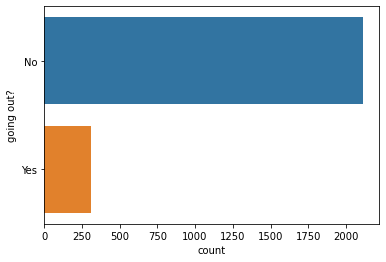

In [67]:
sns.countplot(y="going out?", data=df)

<AxesSubplot:xlabel='count', ylabel='gender'>

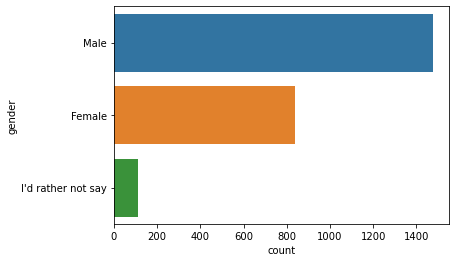

In [68]:
sns.countplot(y="gender", data=df)

<AxesSubplot:xlabel='count', ylabel='gender'>

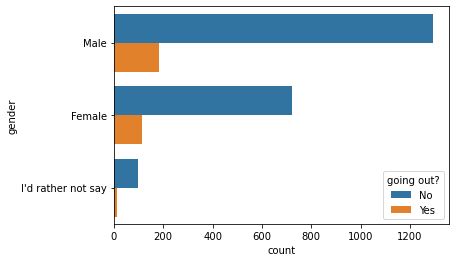

In [69]:
sns.countplot(y="gender", data=df,hue="going out?")

> male more then female and people going out? no more then yes

Text(0.5, 1.0, 'age outlairs')

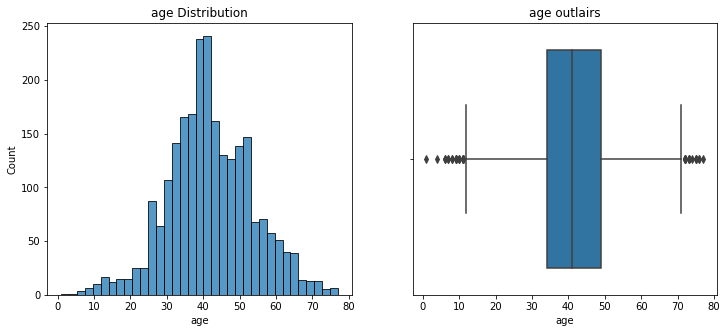

In [70]:
fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=df, x='age', ax=ax[0])
ax[0].set_title('age Distribution')
sns.boxplot(data=df, x='age', ax=ax[1])
ax[1].set_title('age outlairs')
    

<AxesSubplot:xlabel='gender', ylabel='age'>

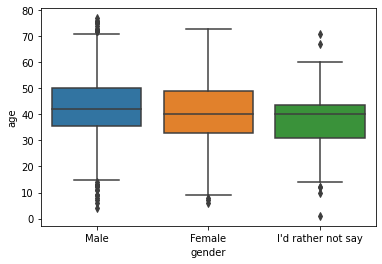

In [71]:
sns.boxplot(x="gender",y="age",data=filal)

<AxesSubplot:xlabel='country', ylabel='age'>

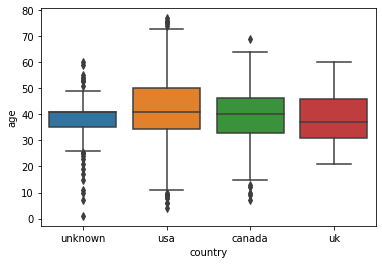

In [72]:
sns.boxplot(x="country",y="age",data=filal)

<AxesSubplot:xlabel='dress', ylabel='age'>

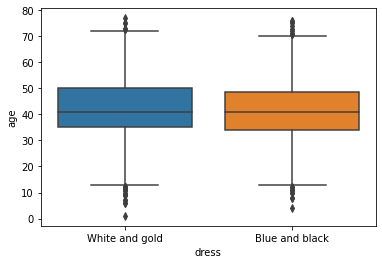

In [73]:
sns.boxplot(x="dress",y="age",data=filal)

<AxesSubplot:xlabel='going out?', ylabel='age'>

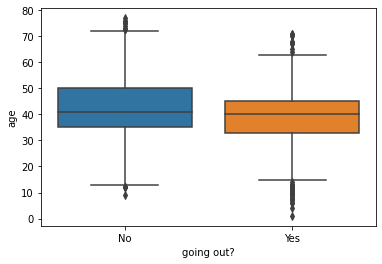

In [74]:
sns.boxplot(x="going out?",y="age",data=filal)

<AxesSubplot:xlabel='media', ylabel='age'>

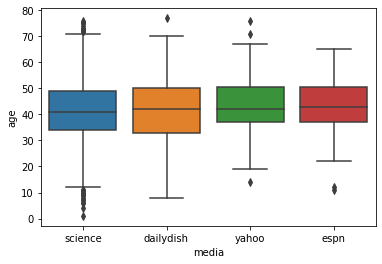

In [75]:
sns.boxplot(x="media",y="age",data=filal)

<AxesSubplot:xlabel='day', ylabel='age'>

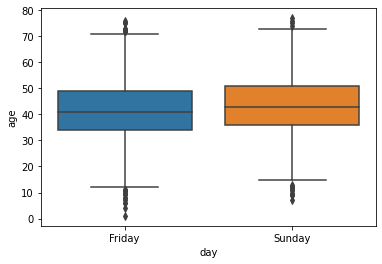

In [76]:
sns.boxplot(x="day",y="age",data=filal)

> most people in  range 25 to 55 but 40 and 41 the max and Few people are less than 10 years old and over 80 years old

<AxesSubplot:xlabel='count', ylabel='country'>

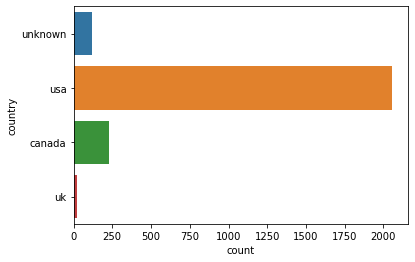

In [77]:
sns.countplot(y="country", data=df)

<AxesSubplot:xlabel='count', ylabel='gender'>

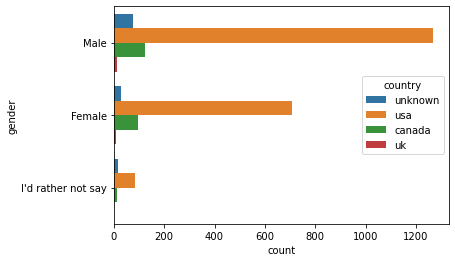

In [78]:
sns.countplot(y="gender", data=df,hue="country")

<AxesSubplot:xlabel='count', ylabel='going out?'>

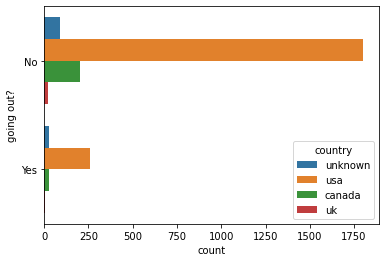

In [79]:
sns.countplot(y="going out?", data=df,hue="country")

<AxesSubplot:xlabel='count', ylabel='media'>

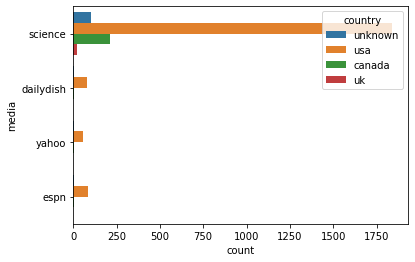

In [80]:
sns.countplot(y="media", data=df,hue="country")

> The most popular is USA 

<AxesSubplot:xlabel='count', ylabel='media'>

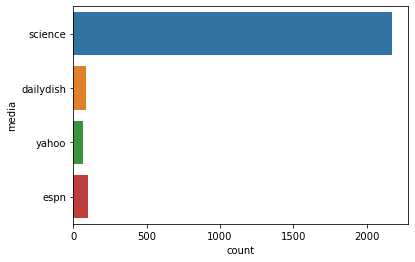

In [81]:
sns.countplot(y="media", data=df)

<AxesSubplot:xlabel='count', ylabel='gender'>

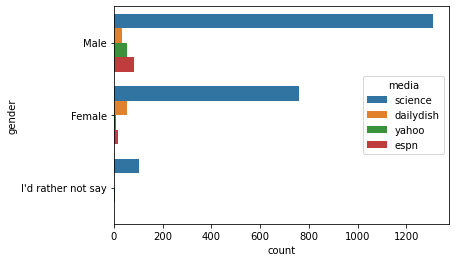

In [82]:
sns.countplot(y="gender", data=df,hue="media")

>  scince IS the most populer media 

<AxesSubplot:xlabel='day', ylabel='age'>

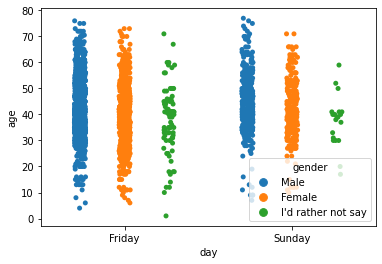

In [83]:
sns.stripplot(x="day", y="age",hue='gender',split=True, data=df)


<AxesSubplot:xlabel='count', ylabel='day'>

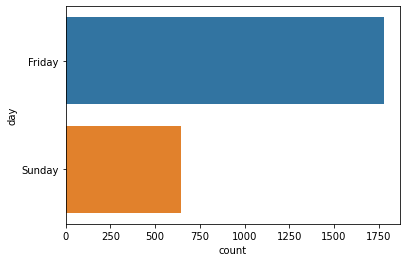

In [84]:
sns.countplot(y="day", data=df)

<AxesSubplot:xlabel='count', ylabel='dress'>

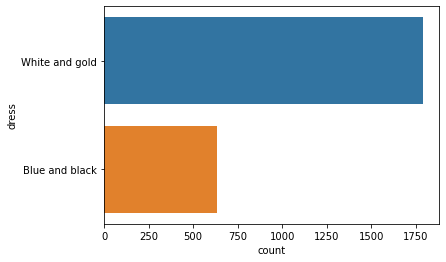

In [85]:
sns.countplot(y="dress", data=df)

<AxesSubplot:xlabel='count', ylabel='day'>

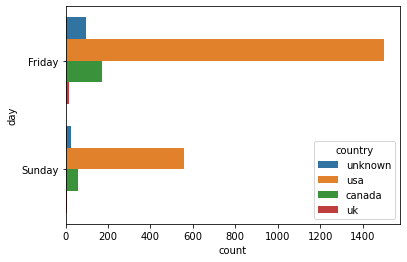

In [86]:
sns.countplot(y="day", data=df, hue="country")

>friday more then sunday and white and gold more then blue and black

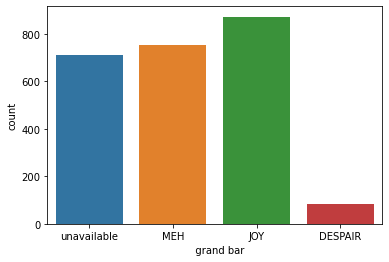

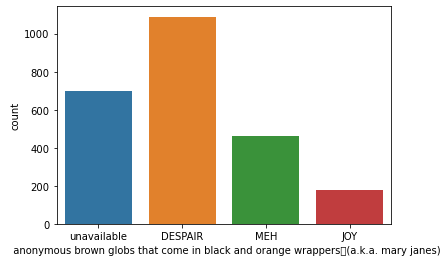

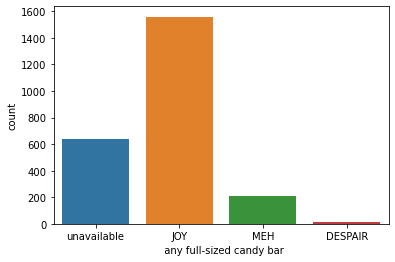

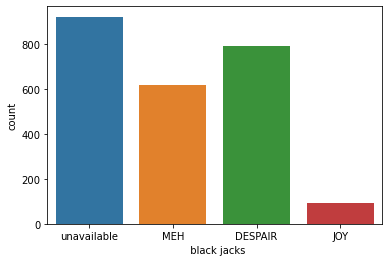

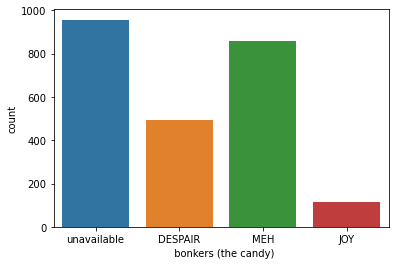

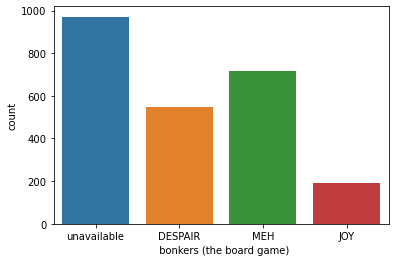

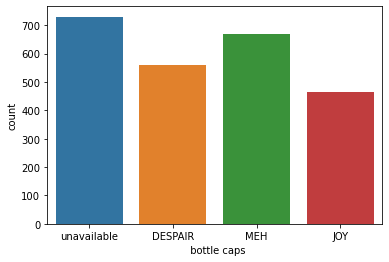

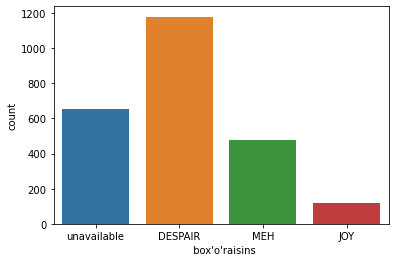

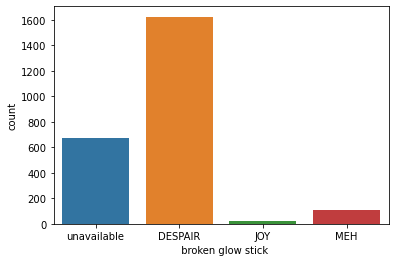

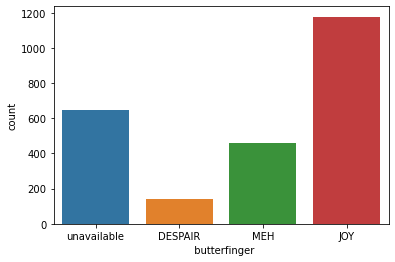

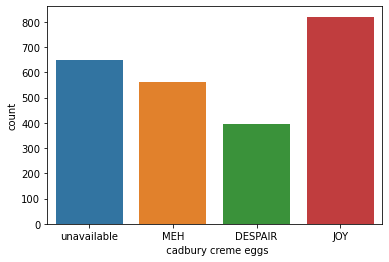

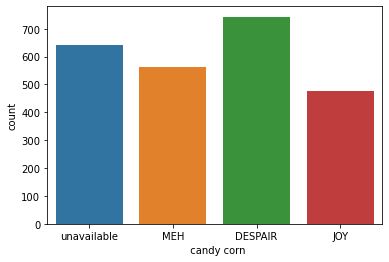

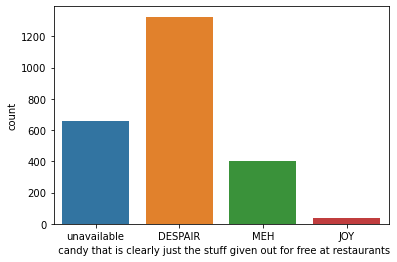

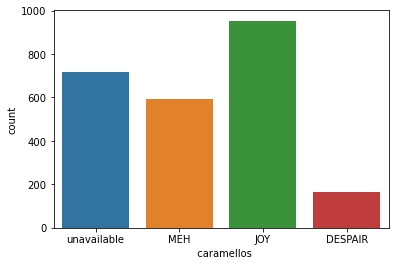

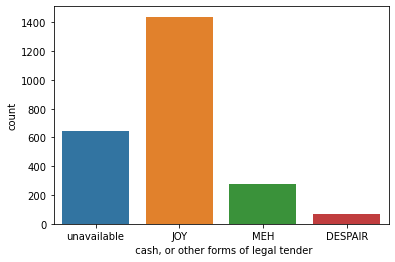

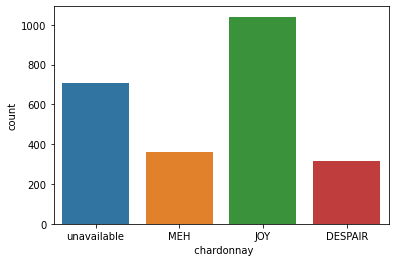

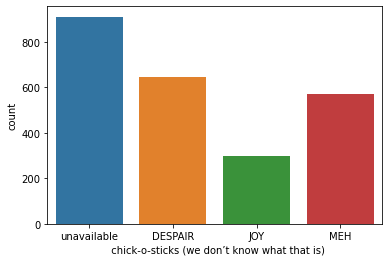

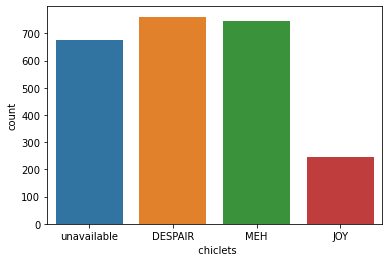

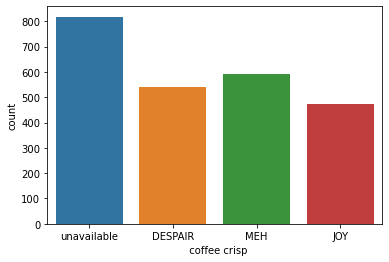

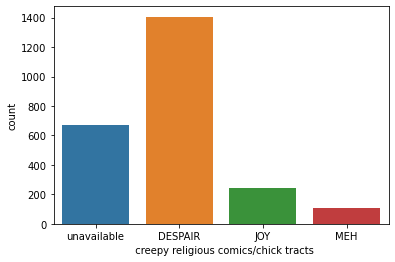

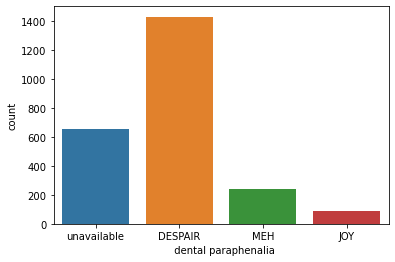

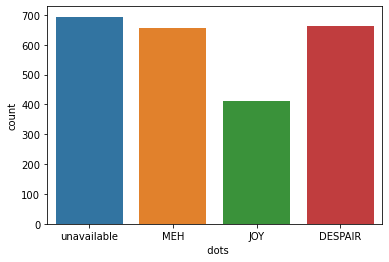

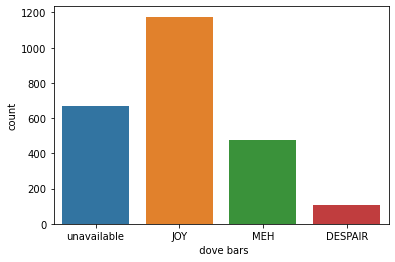

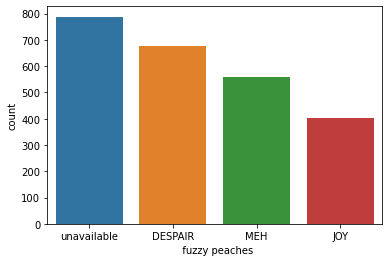

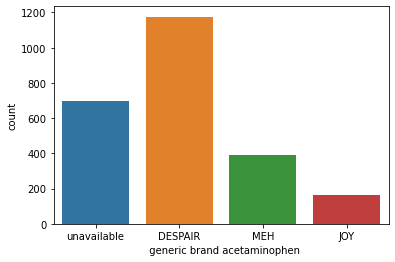

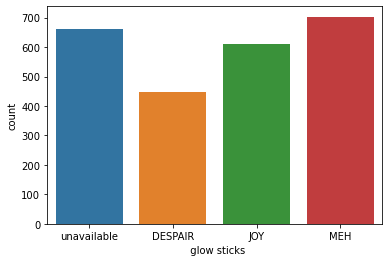

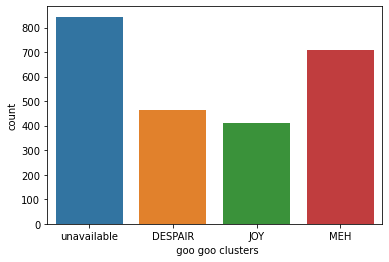

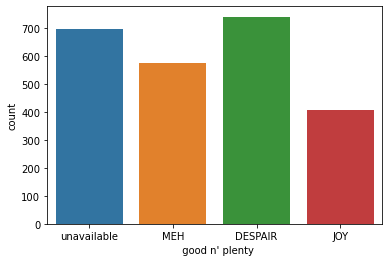

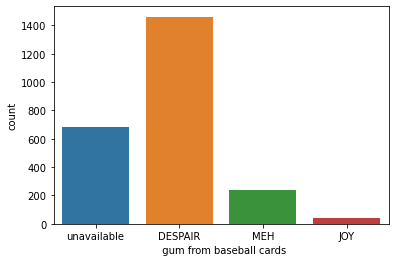

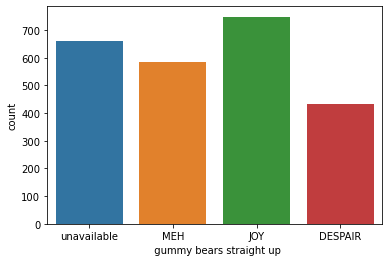

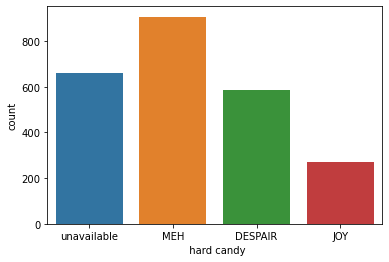

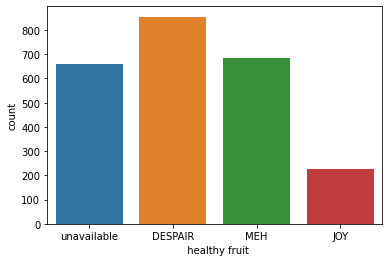

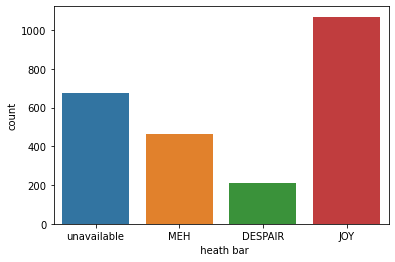

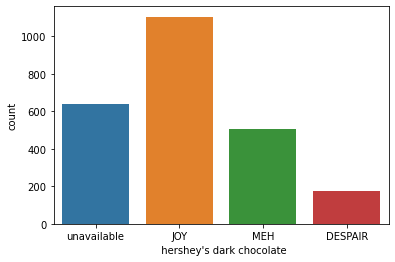

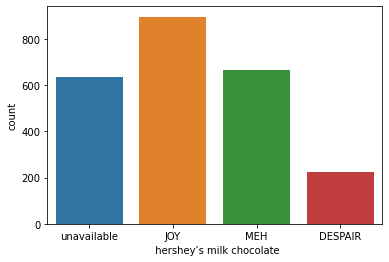

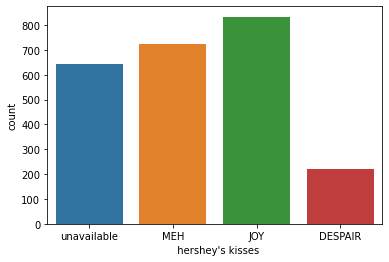

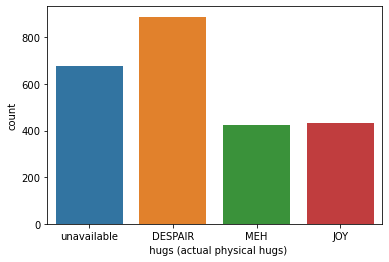

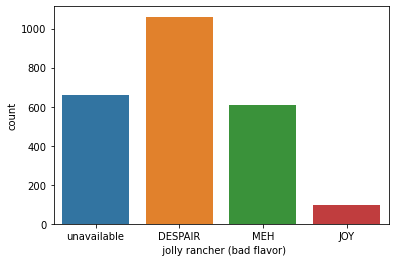

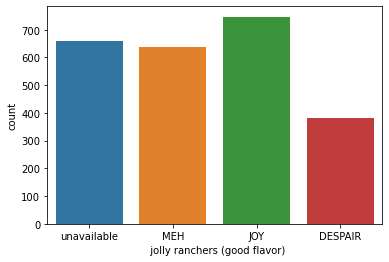

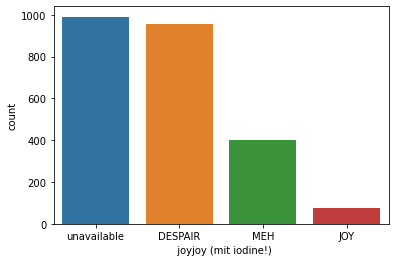

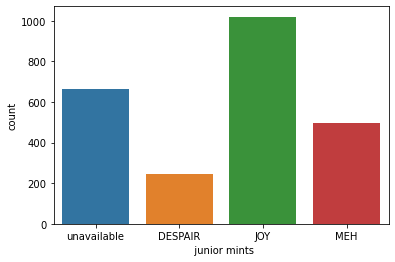

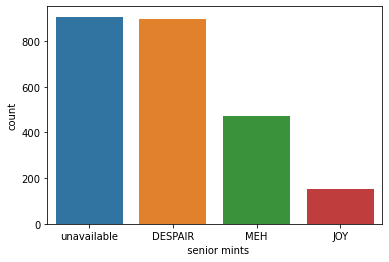

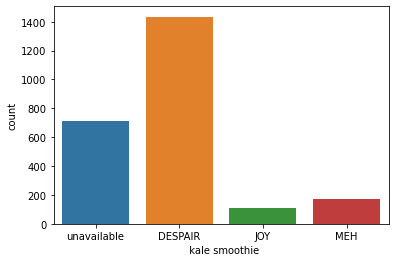

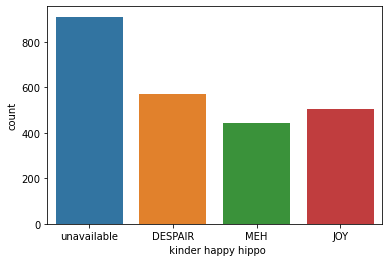

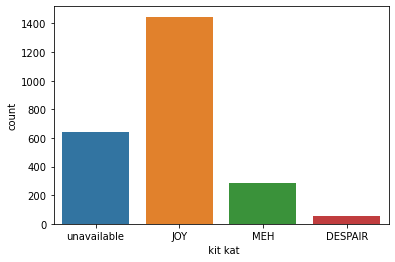

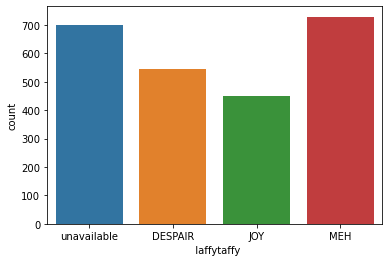

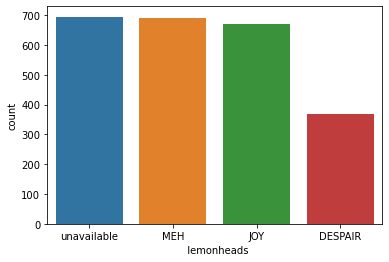

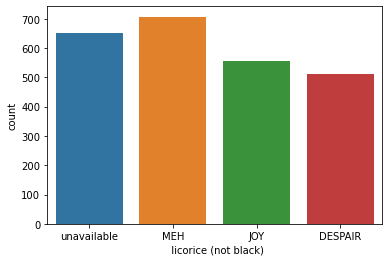

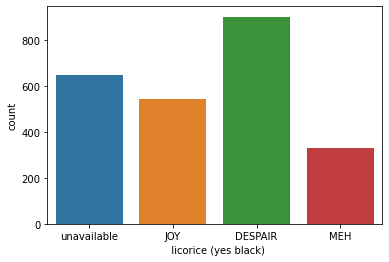

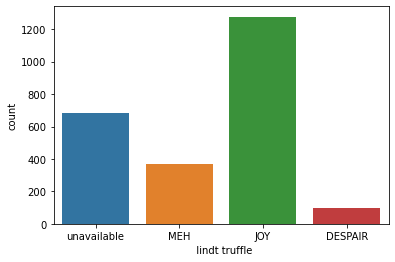

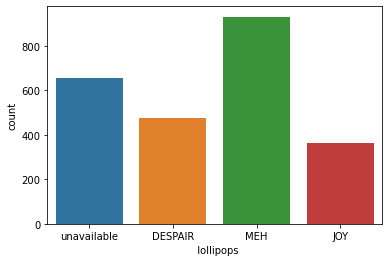

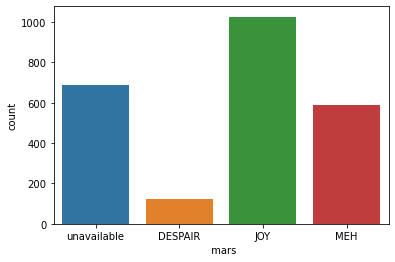

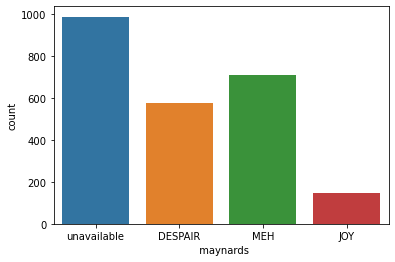

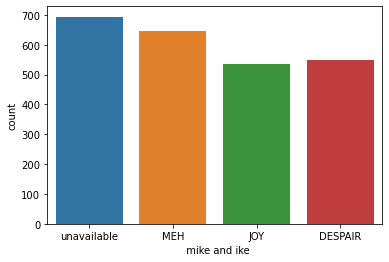

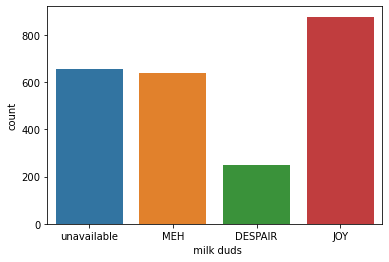

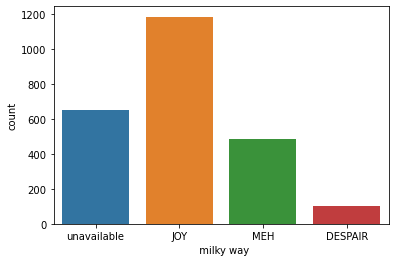

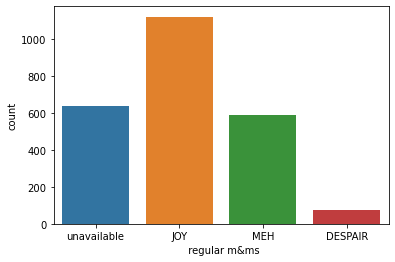

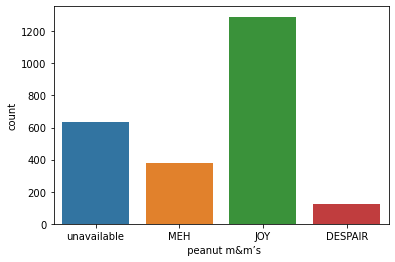

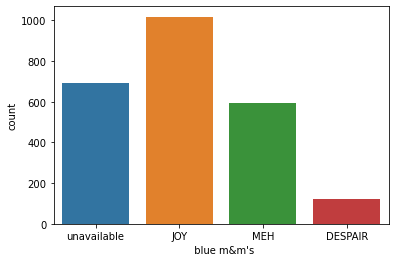

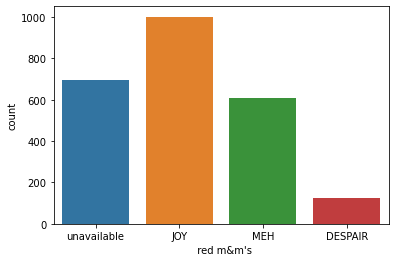

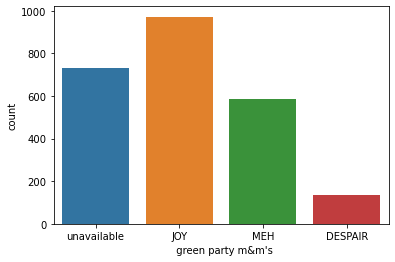

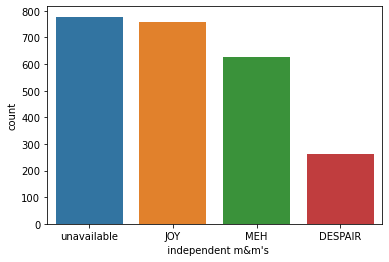

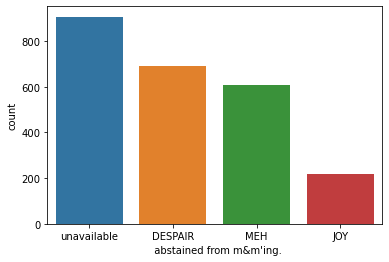

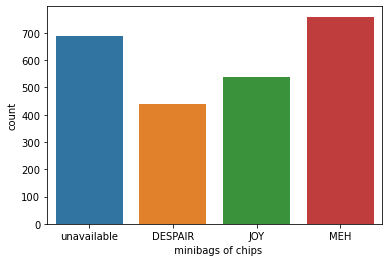

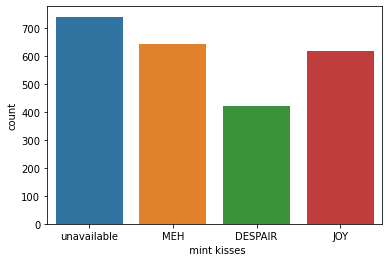

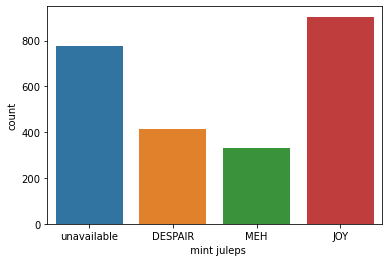

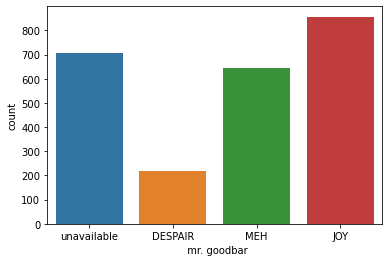

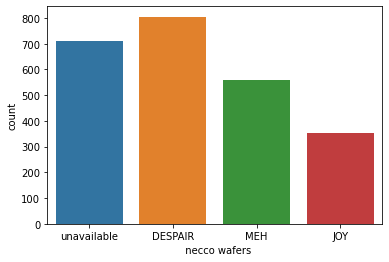

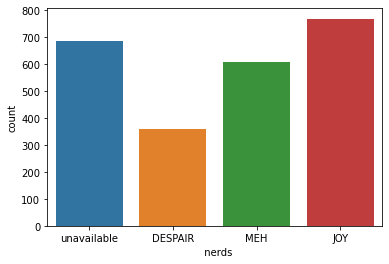

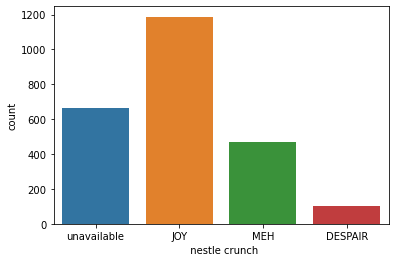

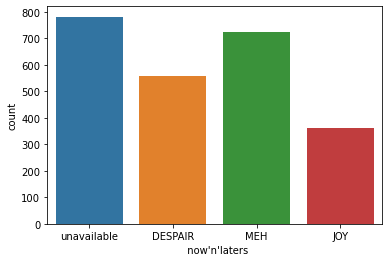

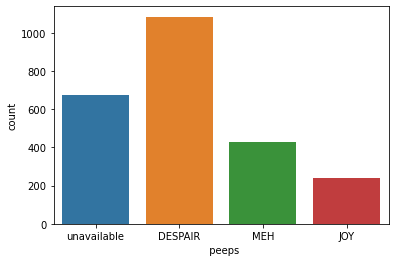

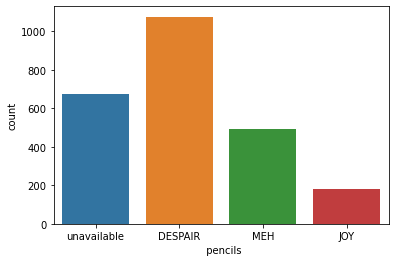

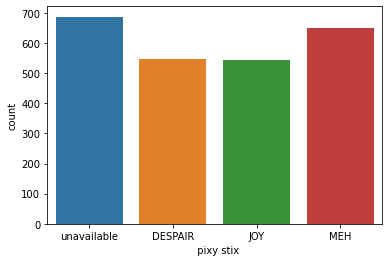

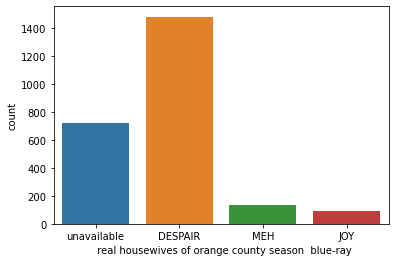

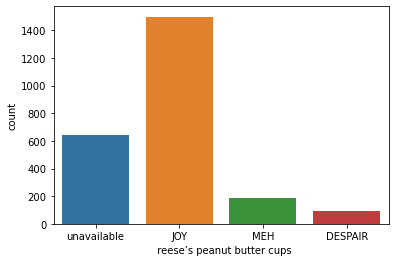

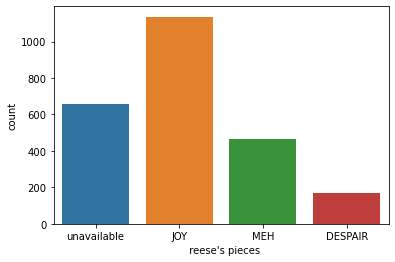

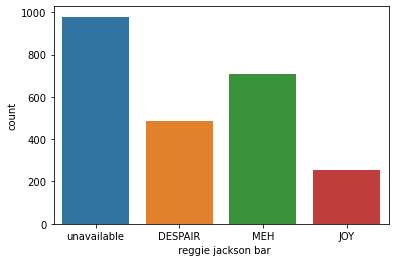

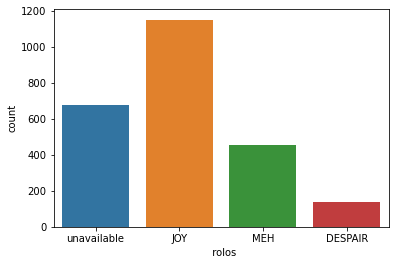

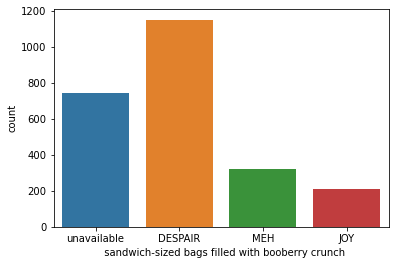

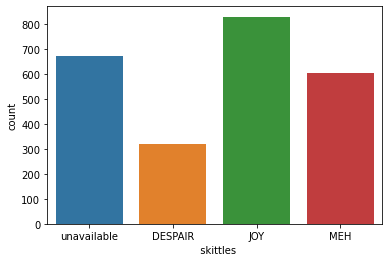

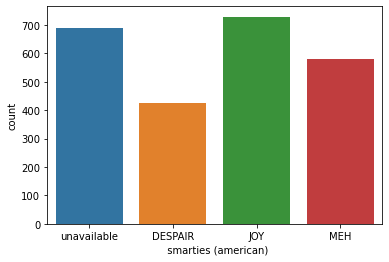

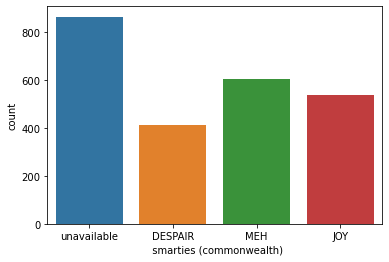

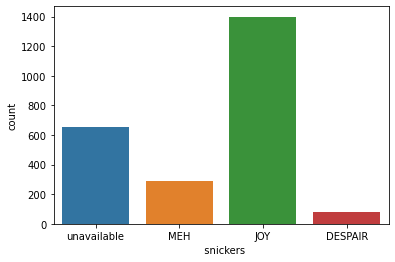

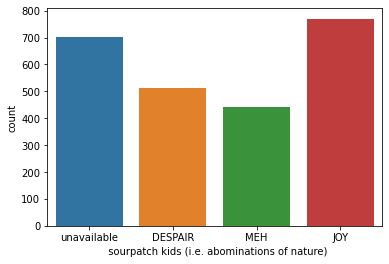

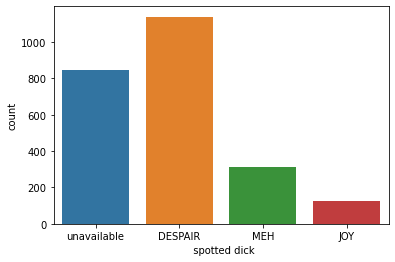

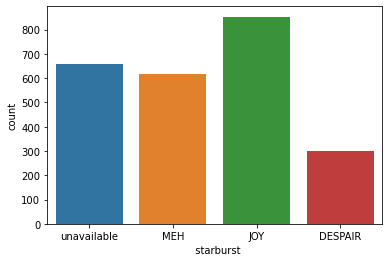

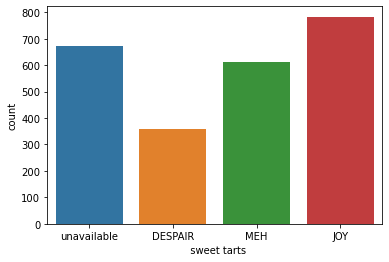

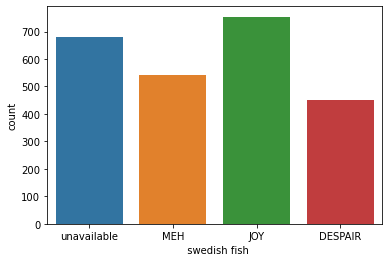

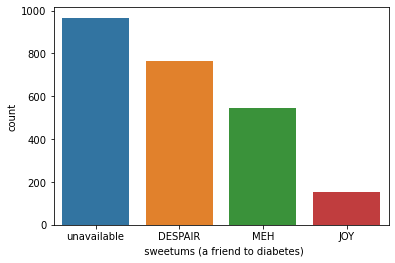

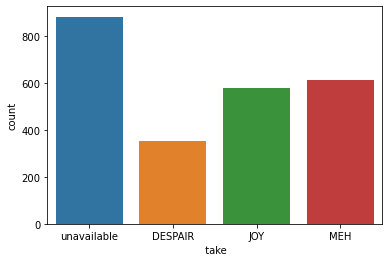

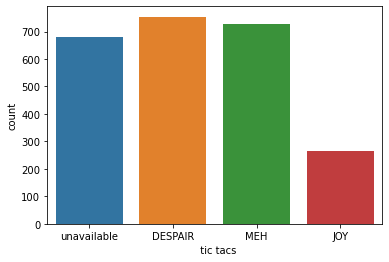

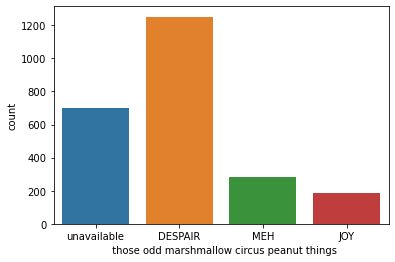

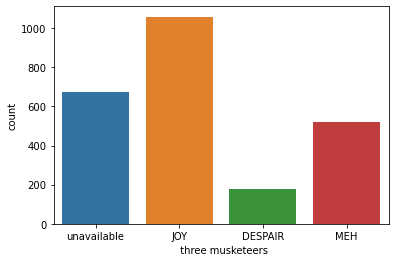

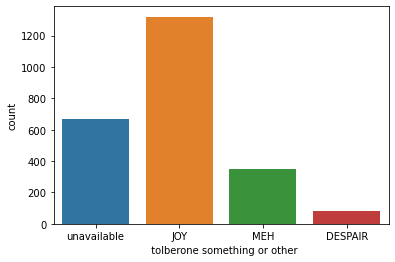

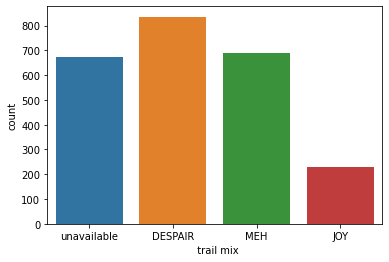

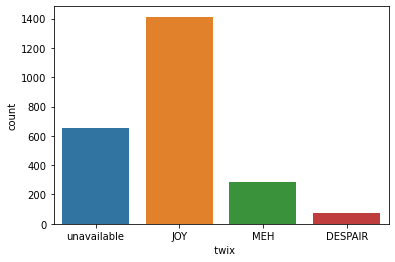

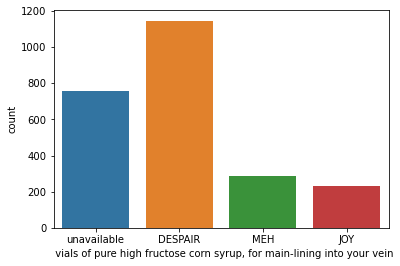

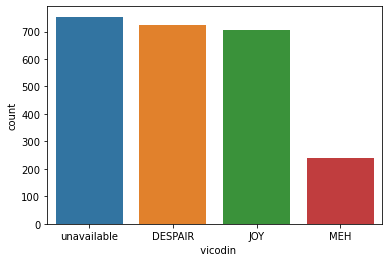

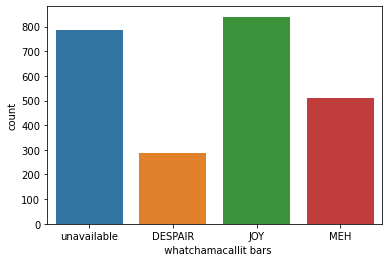

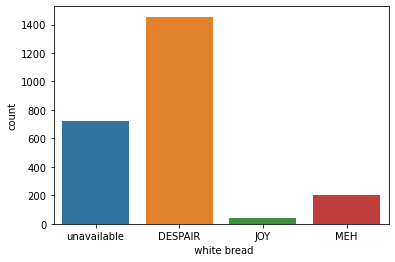

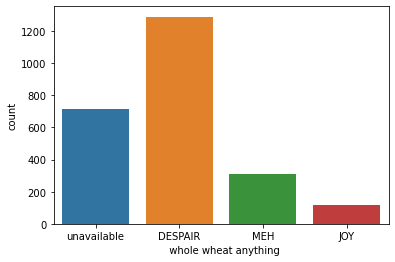

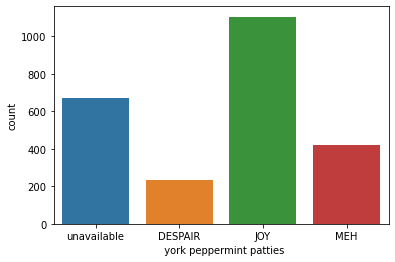

In [87]:
for i in  fil.columns:
    sns.countplot(x=i ,data=fil)
    plt.show()

In [88]:
fil.describe()

,grand bar,anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),any full-sized candy bar,black jacks,bonkers (the candy),bonkers (the board game),bottle caps,box'o'raisins,broken glow stick,butterfinger,cadbury creme eggs,candy corn,candy that is clearly just the stuff given out for free at restaurants,caramellos,"cash, or other forms of legal tender",chardonnay,chick-o-sticks (we don’t know what that is),chiclets,coffee crisp,creepy religious comics/chick tracts,dental paraphenalia,dots,dove bars,fuzzy peaches,generic brand acetaminophen,glow sticks,goo goo clusters,good n' plenty,gum from baseball cards,gummy bears straight up,hard candy,healthy fruit,heath bar,hershey's dark chocolate,hershey’s milk chocolate,hershey's kisses,hugs (actual physical hugs),jolly rancher (bad flavor),jolly ranchers (good flavor),joyjoy (mit iodine!),junior mints,senior mints,kale smoothie,kinder happy hippo,kit kat,laffytaffy,lemonheads,licorice (not black),licorice (yes black),lindt truffle,lollipops,mars,maynards,mike and ike,milk duds,milky way,regular m&ms,peanut m&m’s,blue m&m's,red m&m's,green party m&m's,independent m&m's,abstained from m&m'ing.,minibags of chips,mint kisses,mint juleps,mr. goodbar,necco wafers,nerds,nestle crunch,now'n'laters,peeps,pencils,pixy stix,real housewives of orange county season blue-ray,reese’s peanut butter cups,reese's pieces,reggie jackson bar,rolos,sandwich-sized bags filled with booberry crunch,skittles,smarties (american),smarties (commonwealth),snickers,sourpatch kids (i.e. abominations of nature),spotted dick,starburst,sweet tarts,swedish fish,sweetums (a friend to diabetes),take,tic tacs,those odd marshmallow circus peanut things,three musketeers,tolberone something or other,trail mix,twix,"vials of pure high fructose corn syrup, for main-lining into your vein",vicodin,whatchamacallit bars,white bread,whole wheat anything,york peppermint patties
count,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425
unique,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
top,JOY,DESPAIR,JOY,unavailable,unavailable,unavailable,unavailable,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,unavailable,DESPAIR,unavailable,DESPAIR,DESPAIR,unavailable,JOY,unavailable,DESPAIR,MEH,unavailable,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,unavailable,JOY,unavailable,DESPAIR,unavailable,JOY,MEH,unavailable,MEH,DESPAIR,JOY,MEH,JOY,unavailable,unavailable,JOY,JOY,JOY,JOY,JOY,JOY,JOY,unavailable,unavailable,MEH,unavailable,JOY,JOY,DESPAIR,JOY,JOY,unavailable,DESPAIR,DESPAIR,unavailable,DESPAIR,JOY,JOY,unavailable,JOY,DESPAIR,JOY,JOY,unavailable,JOY,JOY,DESPAIR,JOY,JOY,JOY,unavailable,unavailable,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,unavailable,JOY,DESPAIR,DESPAIR,JOY
freq,873,1089,1559,923,957,971,730,1179,1625,1177,820,743,1325,953,1439,1040,911,761,818,1406,1433,694,1176,788,1176,703,844,742,1462,748,907,855,1069,1105,896,834,889,1061,747,991,1020,907,1435,910,1447,729,695,707,902,1277,931,1026,989,694,878,1185,1122,1291,1018,1001,972,778,907,759,741,904,857,805,769,1188,782,1085,1076,687,1480,1498,1136,979,1151,1151,829,729,866,1399,770,1140,853,783,754,967,882,754,1252,1058,1320,836,1413,1146,754,840,1455,1289,1105


In [89]:
fil.mode()

,grand bar,anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),any full-sized candy bar,black jacks,bonkers (the candy),bonkers (the board game),bottle caps,box'o'raisins,broken glow stick,butterfinger,cadbury creme eggs,candy corn,candy that is clearly just the stuff given out for free at restaurants,caramellos,"cash, or other forms of legal tender",chardonnay,chick-o-sticks (we don’t know what that is),chiclets,coffee crisp,creepy religious comics/chick tracts,dental paraphenalia,dots,dove bars,fuzzy peaches,generic brand acetaminophen,glow sticks,goo goo clusters,good n' plenty,gum from baseball cards,gummy bears straight up,hard candy,healthy fruit,heath bar,hershey's dark chocolate,hershey’s milk chocolate,hershey's kisses,hugs (actual physical hugs),jolly rancher (bad flavor),jolly ranchers (good flavor),joyjoy (mit iodine!),junior mints,senior mints,kale smoothie,kinder happy hippo,kit kat,laffytaffy,lemonheads,licorice (not black),licorice (yes black),lindt truffle,lollipops,mars,maynards,mike and ike,milk duds,milky way,regular m&ms,peanut m&m’s,blue m&m's,red m&m's,green party m&m's,independent m&m's,abstained from m&m'ing.,minibags of chips,mint kisses,mint juleps,mr. goodbar,necco wafers,nerds,nestle crunch,now'n'laters,peeps,pencils,pixy stix,real housewives of orange county season blue-ray,reese’s peanut butter cups,reese's pieces,reggie jackson bar,rolos,sandwich-sized bags filled with booberry crunch,skittles,smarties (american),smarties (commonwealth),snickers,sourpatch kids (i.e. abominations of nature),spotted dick,starburst,sweet tarts,swedish fish,sweetums (a friend to diabetes),take,tic tacs,those odd marshmallow circus peanut things,three musketeers,tolberone something or other,trail mix,twix,"vials of pure high fructose corn syrup, for main-lining into your vein",vicodin,whatchamacallit bars,white bread,whole wheat anything,york peppermint patties
0,JOY,DESPAIR,JOY,unavailable,unavailable,unavailable,unavailable,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,unavailable,DESPAIR,unavailable,DESPAIR,DESPAIR,unavailable,JOY,unavailable,DESPAIR,MEH,unavailable,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,unavailable,JOY,unavailable,DESPAIR,unavailable,JOY,MEH,unavailable,MEH,DESPAIR,JOY,MEH,JOY,unavailable,unavailable,JOY,JOY,JOY,JOY,JOY,JOY,JOY,unavailable,unavailable,MEH,unavailable,JOY,JOY,DESPAIR,JOY,JOY,unavailable,DESPAIR,DESPAIR,unavailable,DESPAIR,JOY,JOY,unavailable,JOY,DESPAIR,JOY,JOY,unavailable,JOY,JOY,DESPAIR,JOY,JOY,JOY,unavailable,unavailable,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,unavailable,JOY,DESPAIR,DESPAIR,JOY


>  the columns has the top unavailable that mean alot of peapole don't know thing about this kind of candy 

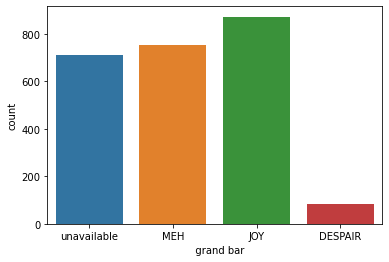

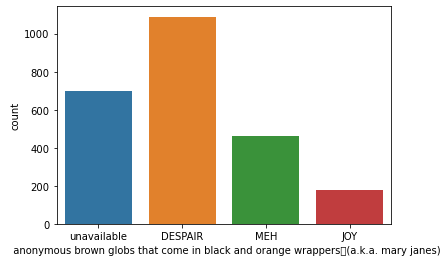

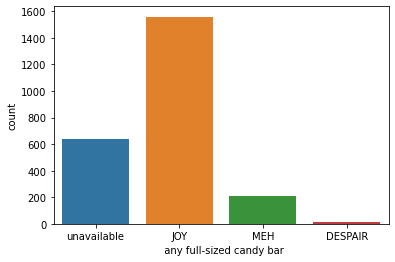

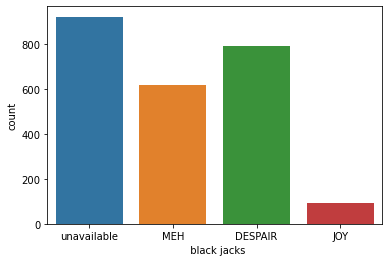

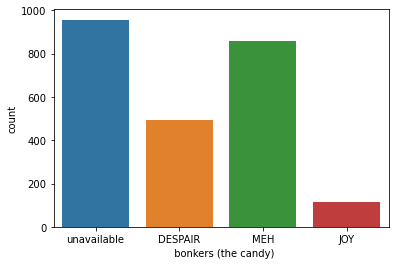

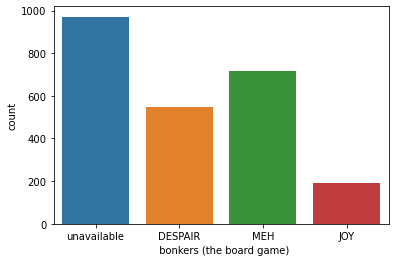

In [90]:
for i in  fil.iloc[:,0:6]:
    sns.countplot(x=i ,data=fil)
    plt.show()

> 

In [91]:
filal.head()

,going out?,gender,age,country,grand bar,anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),any full-sized candy bar,black jacks,bonkers (the candy),bonkers (the board game),bottle caps,box'o'raisins,broken glow stick,butterfinger,cadbury creme eggs,candy corn,candy that is clearly just the stuff given out for free at restaurants,caramellos,"cash, or other forms of legal tender",chardonnay,chick-o-sticks (we don’t know what that is),chiclets,coffee crisp,creepy religious comics/chick tracts,dental paraphenalia,dots,dove bars,fuzzy peaches,generic brand acetaminophen,glow sticks,goo goo clusters,good n' plenty,gum from baseball cards,gummy bears straight up,hard candy,healthy fruit,heath bar,hershey's dark chocolate,hershey’s milk chocolate,hershey's kisses,hugs (actual physical hugs),jolly rancher (bad flavor),jolly ranchers (good flavor),joyjoy (mit iodine!),junior mints,senior mints,kale smoothie,kinder happy hippo,kit kat,laffytaffy,lemonheads,licorice (not black),licorice (yes black),lindt truffle,lollipops,mars,maynards,mike and ike,milk duds,milky way,regular m&ms,peanut m&m’s,blue m&m's,red m&m's,green party m&m's,independent m&m's,abstained from m&m'ing.,minibags of chips,mint kisses,mint juleps,mr. goodbar,necco wafers,nerds,nestle crunch,now'n'laters,peeps,pencils,pixy stix,real housewives of orange county season blue-ray,reese’s peanut butter cups,reese's pieces,reggie jackson bar,rolos,sandwich-sized bags filled with booberry crunch,skittles,smarties (american),smarties (commonwealth),snickers,sourpatch kids (i.e. abominations of nature),spotted dick,starburst,sweet tarts,swedish fish,sweetums (a friend to diabetes),take,tic tacs,those odd marshmallow circus peanut things,three musketeers,tolberone something or other,trail mix,twix,"vials of pure high fructose corn syrup, for main-lining into your vein",vicodin,whatchamacallit bars,white bread,whole wheat anything,york peppermint patties,dress,day,media
0,No,Male,41.0,unknown,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,White and gold,Friday,science
1,No,Male,44.0,usa,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,science
2,No,Male,49.0,usa,unavailable

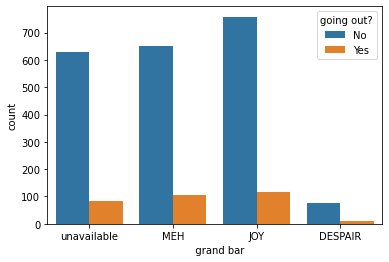

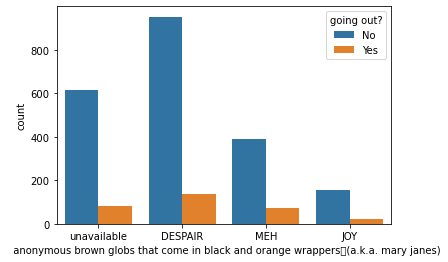

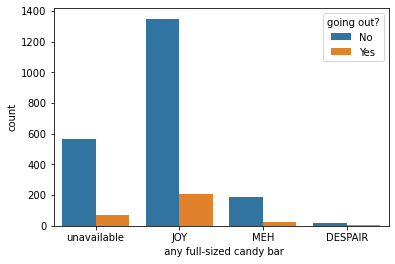

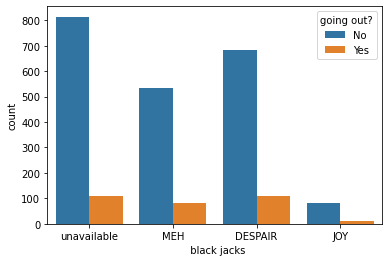

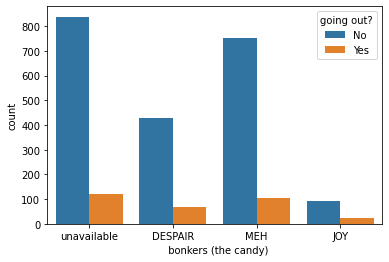

In [92]:
for i in  filal.iloc[:,4:9]:
    sns.countplot(x=i ,data=filal,hue="going out?")
    plt.show()

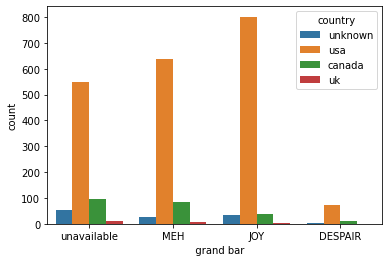

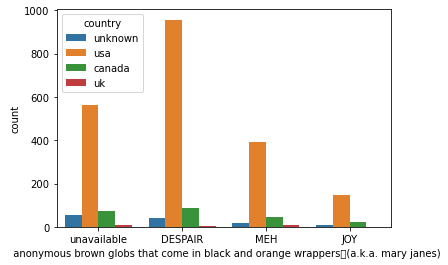

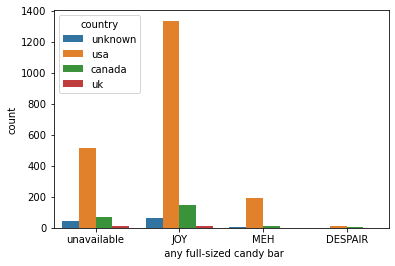

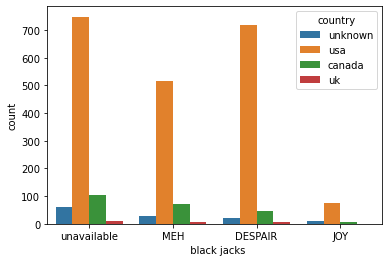

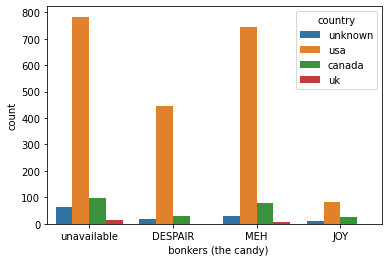

In [93]:
for i in  filal.iloc[:,4:9]:
    sns.countplot(x=i ,data=filal,hue="country")
    plt.show()

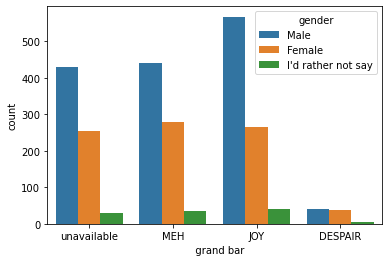

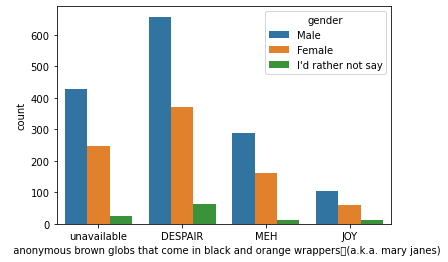

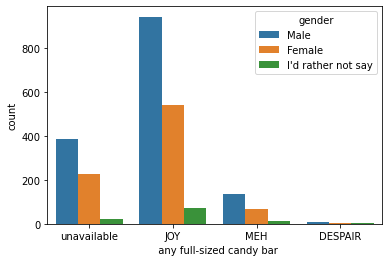

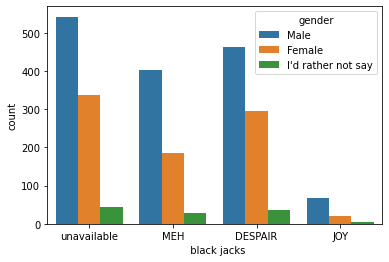

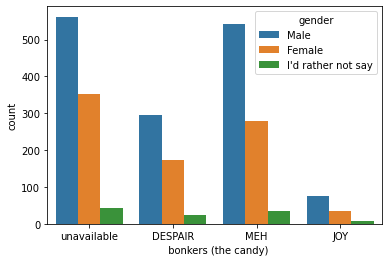

In [94]:
for i in  filal.iloc[:,4:9]:
    sns.countplot(x=i ,data=filal,hue="gender")
    plt.show()

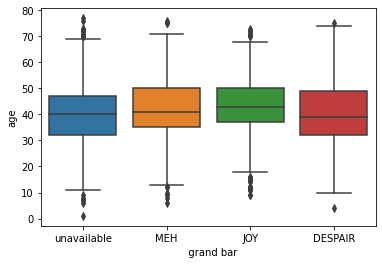

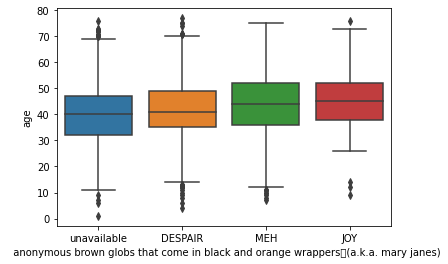

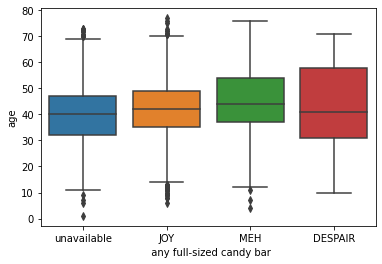

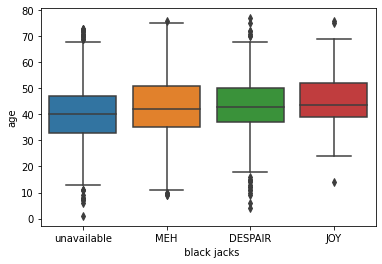

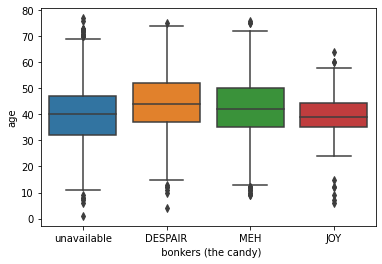

In [95]:
for i in  filal.iloc[:,4:9]:
    sns.boxplot(x=i,y="age",data=filal)
    plt.show()

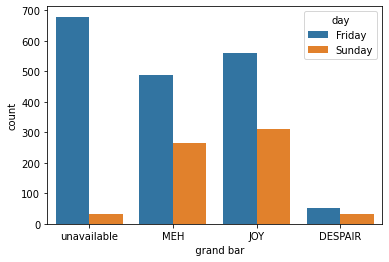

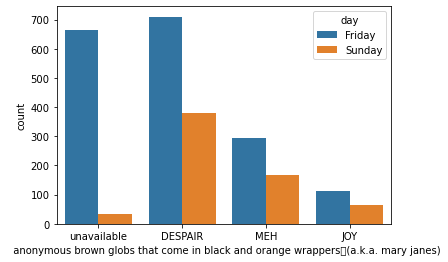

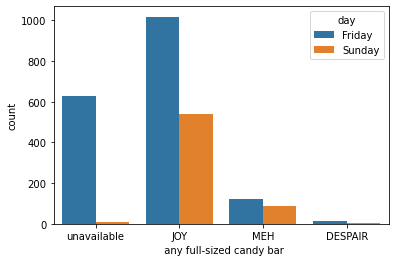

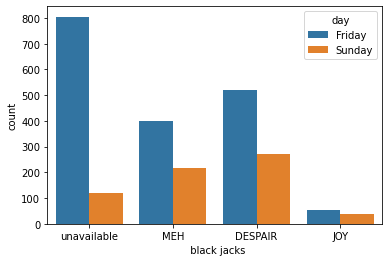

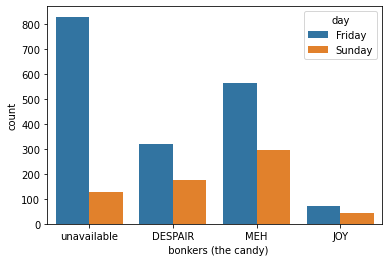

In [96]:
for i in  filal.iloc[:,4:9]:
    sns.countplot(x=i ,data=filal,hue="day")
    plt.show()

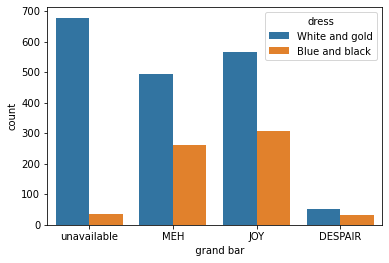

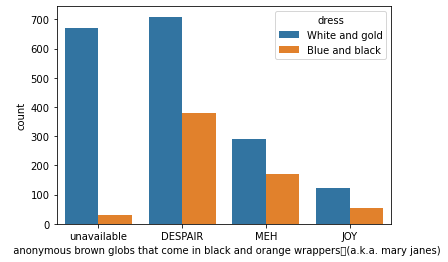

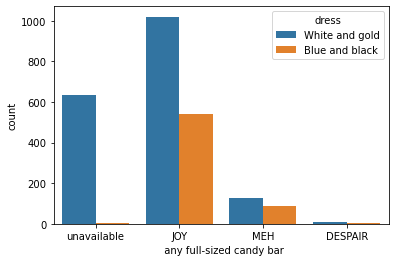

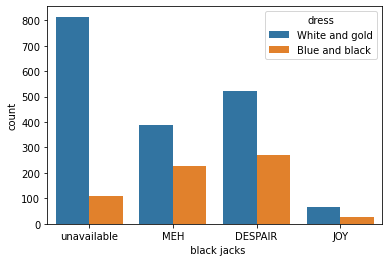

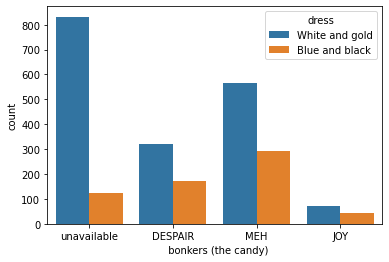

In [97]:
for i in  filal.iloc[:,4:9]:
    sns.countplot(x=i ,data=filal,hue="dress")
    plt.show()

>This data is about Halloween, where males and females and some who did not want to reveal its gender participated, but the largest number of males was followed by females, and the vast majority of them participated with the aim of treating themselves as they ranged from 18 to 80 years, where the majority of the participants were from 21 To 62. most of the happy people were men where more than two countries participated, namely the United States of America and then Canada, and data show most media use is scince 

>alot of  columns has the top unavailable that mean alot of peapole don't know thing about this kind of candy
> (analyzes are still not performed here On the rest of the sweets)